In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('HouseListings-Top45Cities-10292023-kaggle.csv',encoding = 'latin1')
print(f'This dataset contains {df.shape[0]} samples and {df.shape[1]} features')

In [96]:
# Looking at the few rows of data randomly
df.sample(5)

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
12026,Oshawa,949900.0,1709 WHITESTONE DR,3,3,Ontario,335949,43.9000,-78.8500,102000.0
14333,Victoria,588000.0,27-453 Head St,3,3,British Columbia,363222,48.4283,-123.3647,85000.0
16440,Regina,399900.0,861 ELLIOTT STREET,2,1,Saskatchewan,226404,50.4547,-104.6067,90000.0
8328,Kitchener,425000.0,#301 -308 LESTER ST,1,1,Ontario,522888,43.4186,-80.4728,92000.0
10308,London,799900.0,3327 MAIDSTONE Lane,3,3,Ontario,423369,42.9836,-81.2497,79500.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [98]:
df.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [99]:
df.duplicated().sum()

2516

In [100]:
# Drop the duplicate rows in the data
df.drop_duplicates(inplace = True)

In [101]:
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.325200e+04,33252.000000,33252.000000,3.325200e+04,33252.000000,33252.000000,33252.000000
mean,9.780968e+05,3.294388,2.555786,6.592545e+05,47.272550,-98.419248,89898.860911
std,1.041994e+06,1.747455,1.385224,1.148804e+06,3.307946,22.728483,12351.789458
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.950000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.600000,82000.000000
50%,7.249000e+05,3.000000,2.000000,2.424600e+05,48.428300,-104.606700,89000.000000
75%,1.124900e+06,4.000000,3.000000,7.295600e+05,49.266700,-79.676900,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [102]:
# Drop the 'Address', 'Latitude' and 'Longitude' columns. I will not use this column to make predictions.
df.drop(['Address','Latitude','Longitude'],axis = 1, inplace = True)

In [103]:
# Drop non-snsical rows from our data. E.g., dropping the row where number of beds is more than 20 and number of bathrooms is more than 10
beds_more_than_20_idx = df[df['Number_Beds'] > 20].index
df.drop(beds_more_than_20_idx,inplace = True)

baths_more_than_10_idx = df[df['Number_Baths'] > 10].index
df.drop(baths_more_than_10_idx, inplace = True)

# There are some data points where the number of bedrooms and number of bathrooms are both 0. These data points do not make sense to me.
# I will drop these daata points
zero_rooms_idx = df[(df['Number_Baths'] == 0) & (df['Number_Beds'] == 0)].index
df.drop(zero_rooms_idx, inplace = True)

# Replacing the value of the number of bedrooms with more than 4 bedrooms to '>4'
greater_than_4_beds_idx = df[df['Number_Beds'] > 4].index
df.loc[greater_than_4_beds_idx,'Number_Beds'] = '>4'
df['Number_Beds'] = df['Number_Beds'].apply(str)

#Replacing the value of the number of bathrooms with more than 3 bathrooms to '>3'
greater_than_3_baths_idx = df[df['Number_Baths'] > 3].index
df.loc[greater_than_3_baths_idx,'Number_Baths'] = '>3'
df['Number_Baths'] = df['Number_Baths'].apply(str)

In [104]:
df.sample(5)

,City,Price,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
19070,Kelowna,825000.0,3,2,British Columbia,181380,85000.0
271,Toronto,685000.0,1,1,Ontario,5647656,97000.0
23824,Red Deer,135000.0,1,1,Alberta,100844,85000.0
10459,London,1499999.0,>4,>3,Ontario,423369,79500.0
22821,Brantford,2260000.0,4,3,Ontario,104688,85000.0


In [105]:
print(f'The size of the data after dropping rows and columns of the data is :- Number of rows: {df.shape[0]} | Number of columns: {df.shape[1]}')

The size of the data after dropping rows and columns of the data is :- Number of rows: 32757 | Number of columns: 7


In [106]:
# Replacing the long province names with shorter names. E.g., Ontario -> ON | Alberta -> AB
# Replacing this will help in data visualization
def short_province(df):
    long_name_list = ['Ontario','British Columbia', 'Alberta', 'Saskatchewan', 'Newfoundland and Labrador', 'New Brunswick', 'Quebec', 'Manitoba','Nova Scotia']
    short_name_list = ['ON', 'BC', 'AB', 'SK', 'NL', 'NB', 'QC', 'MB', 'NS']
    for i in range(len(long_name_list)):
        df.replace(to_replace = long_name_list[i],value = short_name_list[i],inplace = True)
        
short_province(df)

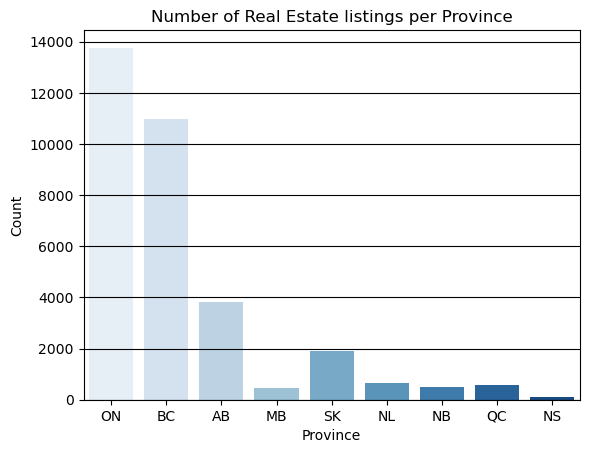

In [107]:
sns.countplot(x = 'Province', data = df, palette = 'Blues')
plt.grid(axis = 'y',color = 'black')
plt.ylabel('Count')
plt.title("Number of Real Estate listings per Province")
plt.show()

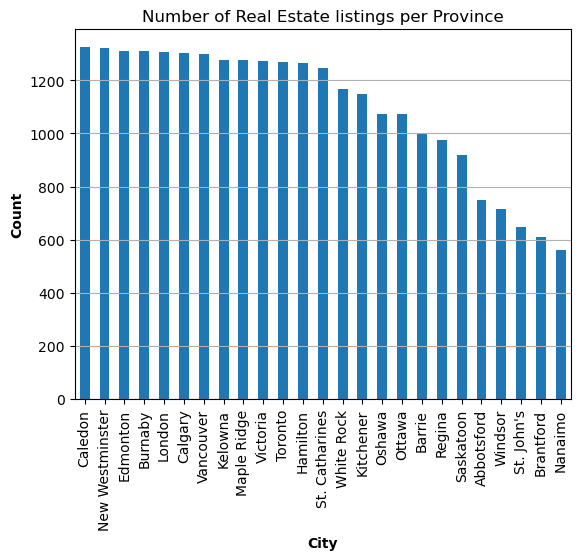

In [108]:
df['City'].value_counts().head(25).plot(kind = 'bar')
plt.grid(axis = 'y')
plt.title("Number of Real Estate listings per Province")
plt.xlabel("City",fontweight = 'bold')
plt.ylabel("Count", fontweight = 'bold')
plt.show()

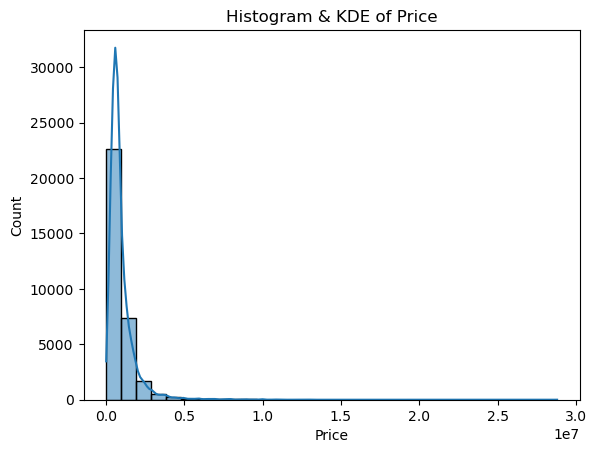

In [109]:
#Kernel denisty Estimation of Price of houses
sns.histplot(df['Price'],kde = True, bins = 30)
plt.title('Histogram & KDE of Price')
plt.show()

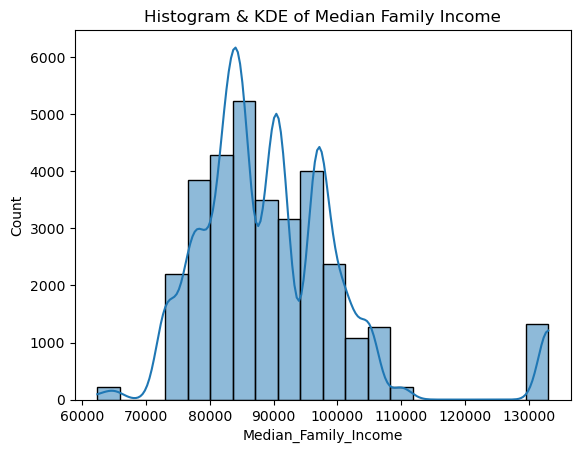

In [110]:
#Kernel Density estimation of median family income
sns.histplot(df['Median_Family_Income'],kde = True, bins = 20)
plt.title('Histogram & KDE of Median Family Income')
plt.show()

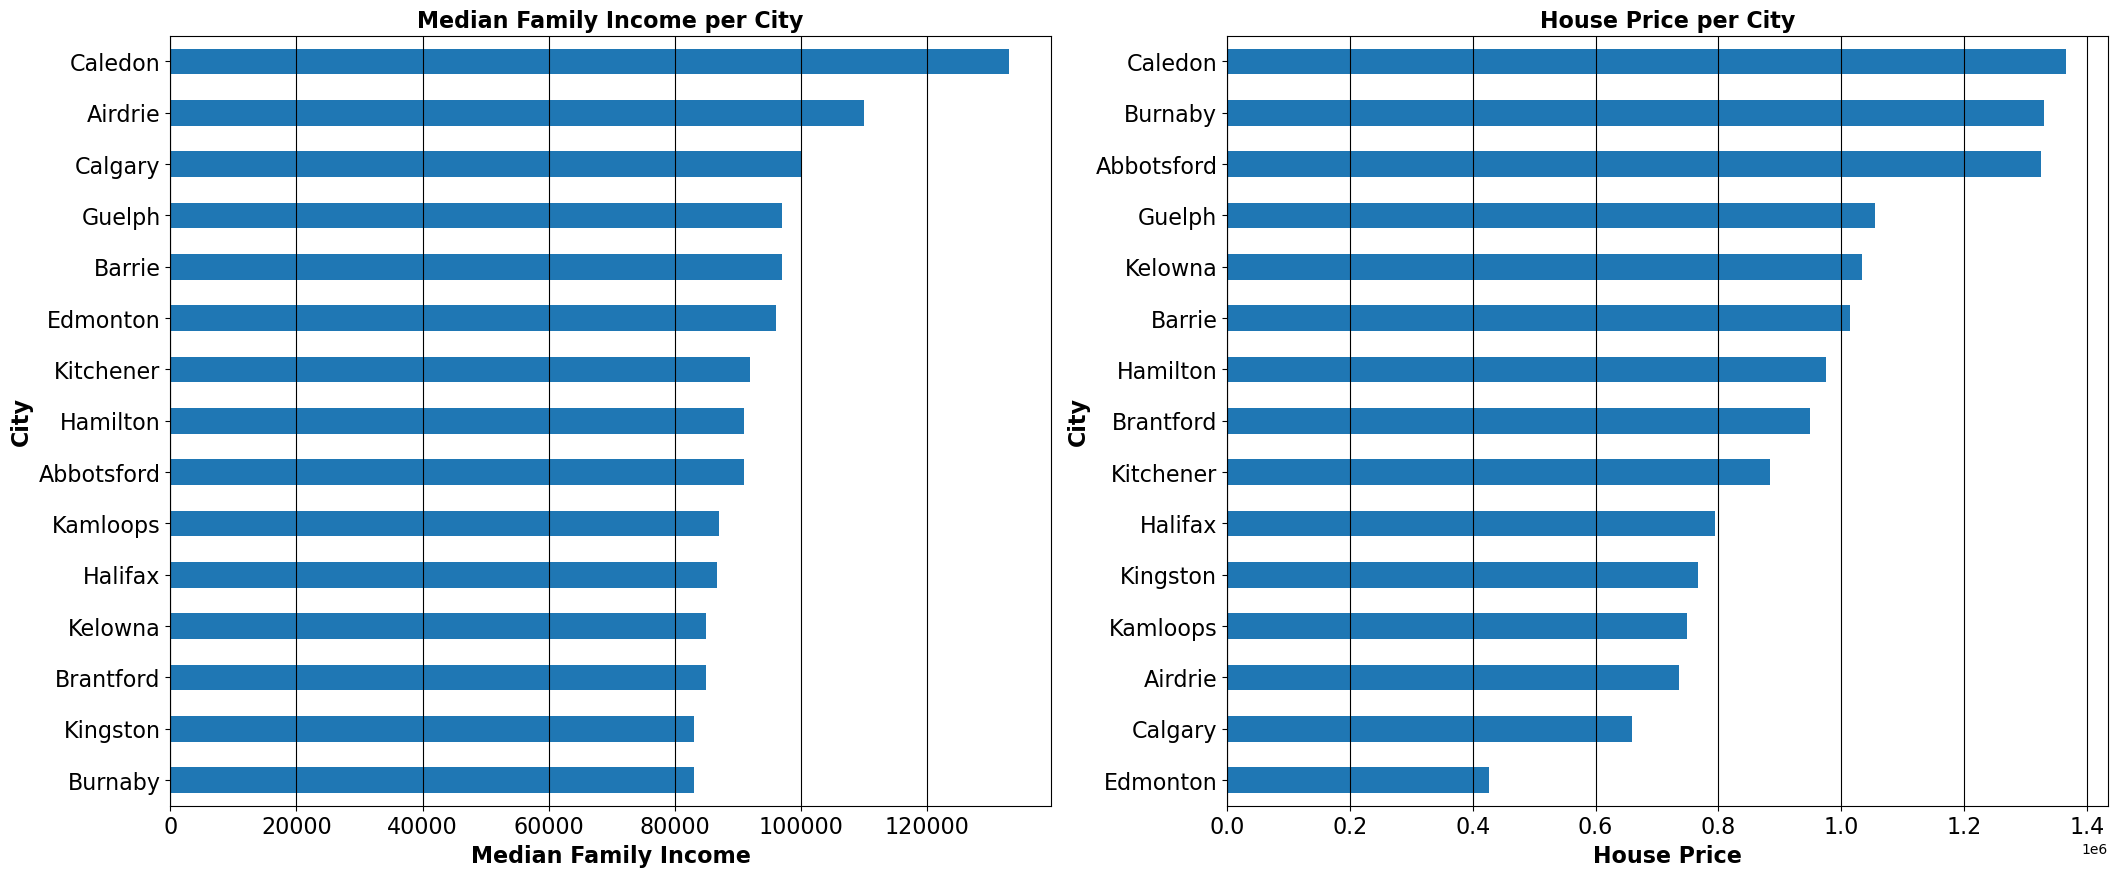

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (25,10))

df.groupby('City')['Median_Family_Income'].mean().head(15).sort_values().plot(kind = 'barh',ax = ax[0])
ax[0].set_ylabel('City',fontweight = 'bold', fontsize = 16)
ax[0].set_xlabel('Median Family Income', fontweight = 'bold', fontsize = 16)
ax[0].set_title('Median Family Income per City', fontweight = 'bold', fontsize = 16)
ax[0].grid(axis = 'x',color = 'black')
ax[0].tick_params(axis='both', labelsize=16, rotation = 0)

df.groupby('City')['Price'].mean().head(15).sort_values().plot(kind = 'barh', ax = ax[1])
ax[1].set_ylabel('City',fontweight = 'bold', fontsize = 16)
ax[1].set_xlabel('House Price', fontweight = 'bold', fontsize = 16)
ax[1].set_title('House Price per City', fontweight = 'bold', fontsize = 16)
ax[1].grid(axis = 'x',color = 'black')
ax[1].tick_params(axis='both', labelsize=16, rotation = 0)

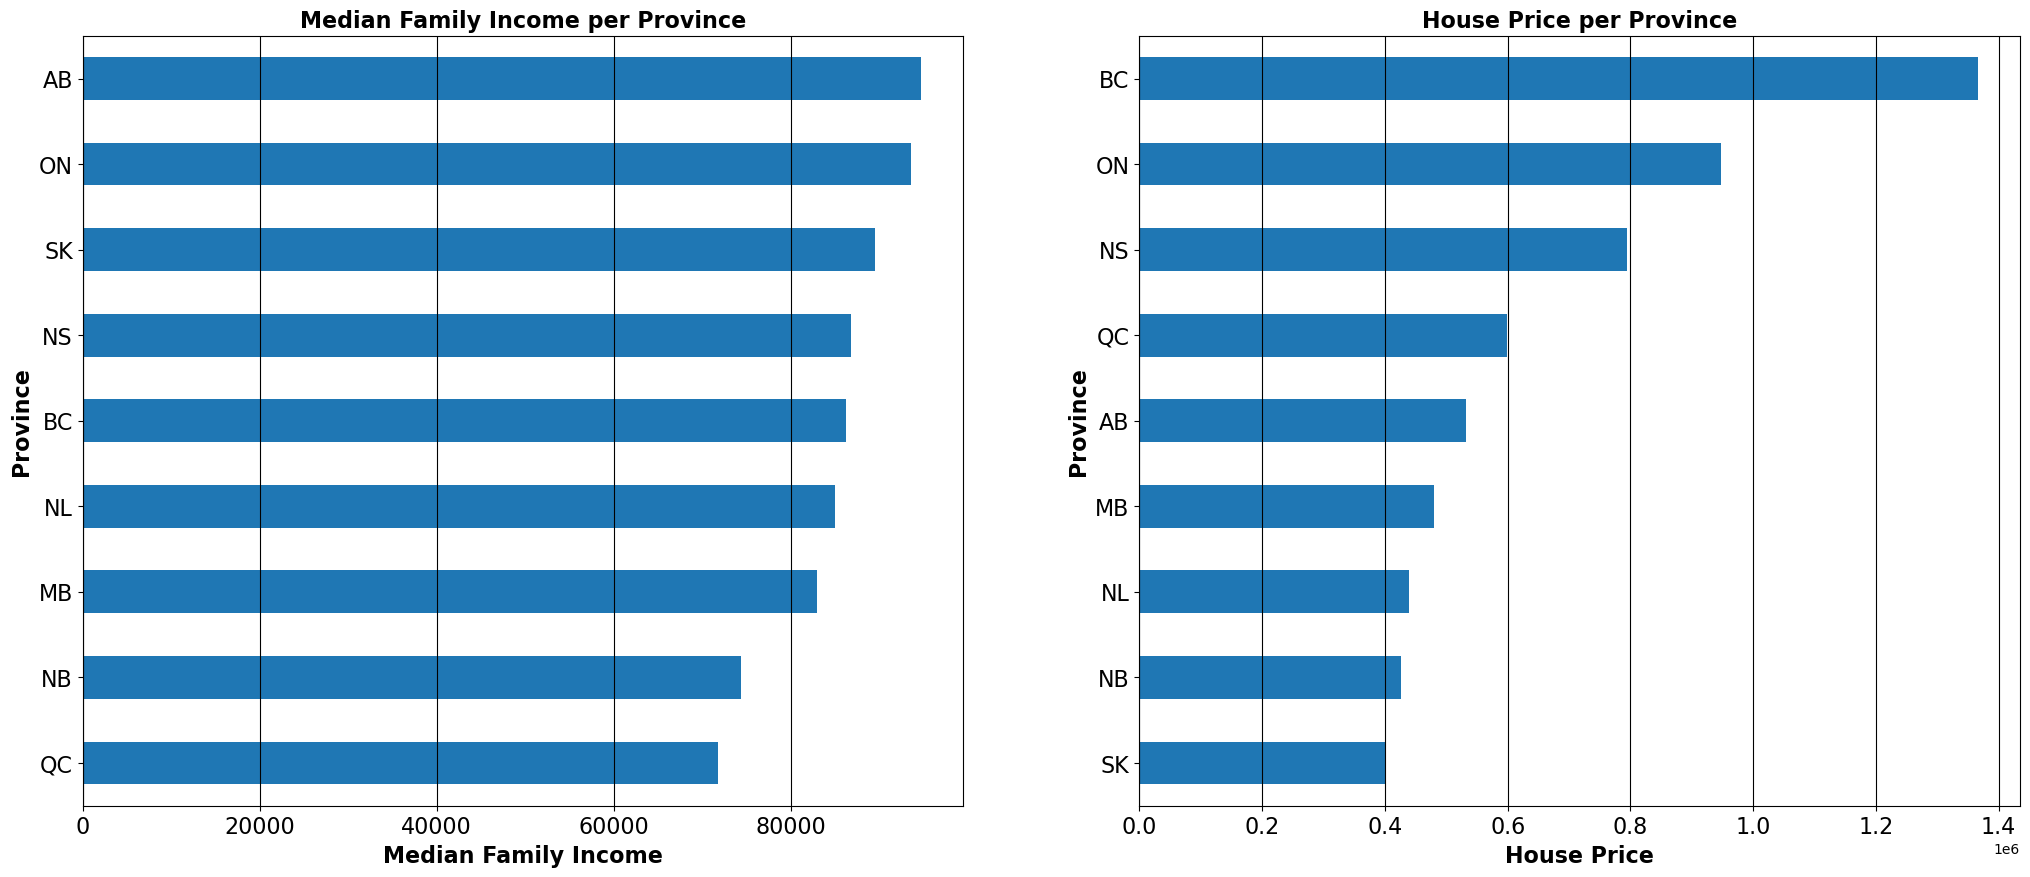

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (25,10))

df.groupby('Province')['Median_Family_Income'].mean().sort_values().plot(kind = 'barh',ax = ax[0])
ax[0].set_ylabel('Province',fontweight = 'bold', fontsize = 16)
ax[0].set_xlabel('Median Family Income', fontweight = 'bold', fontsize = 16)
ax[0].set_title('Median Family Income per Province', fontweight = 'bold', fontsize = 16)
ax[0].grid(axis = 'x',color = 'black')
ax[0].tick_params(axis='both', labelsize=16, rotation = 0)

df.groupby('Province')['Price'].mean().sort_values().plot(kind = 'barh', ax = ax[1])
ax[1].set_ylabel('Province',fontweight = 'bold', fontsize = 16)
ax[1].set_xlabel('House Price', fontweight = 'bold', fontsize = 16)
ax[1].set_title('House Price per Province', fontweight = 'bold', fontsize = 16)
ax[1].grid(axis = 'x',color = 'black')
ax[1].tick_params(axis='both', labelsize=16, rotation = 0)

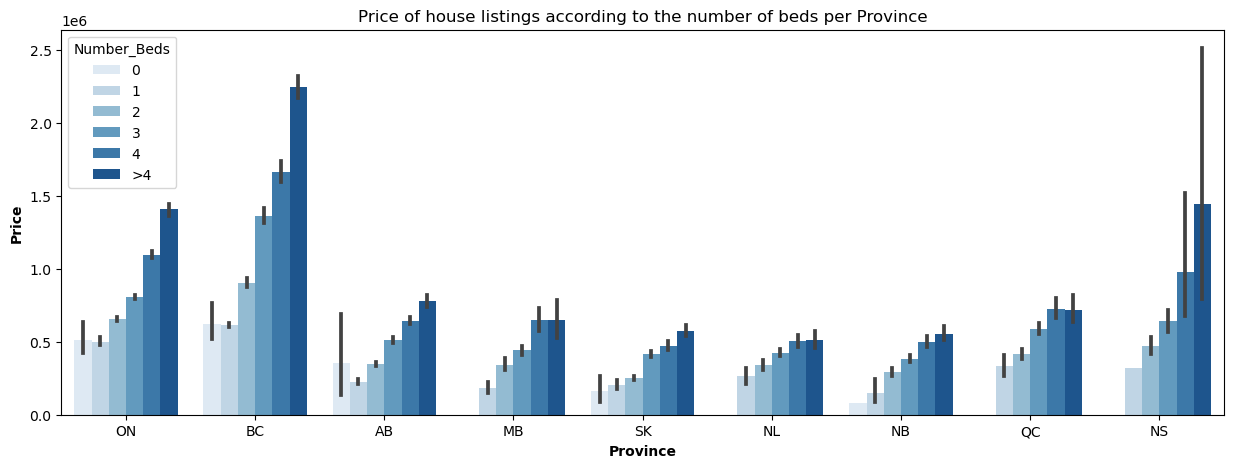

In [113]:
plt.figure(figsize = (15,5))
hue_order = ['0','1','2','3','4','>4']
sns.barplot(data = df,x = 'Province',y = 'Price', hue = 'Number_Beds', hue_order = hue_order, palette = "Blues")
plt.title("Price of house listings according to the number of beds per Province")
plt.xlabel('Province',fontweight = 'bold')
plt.ylabel('Price',fontweight = 'bold')
plt.show()

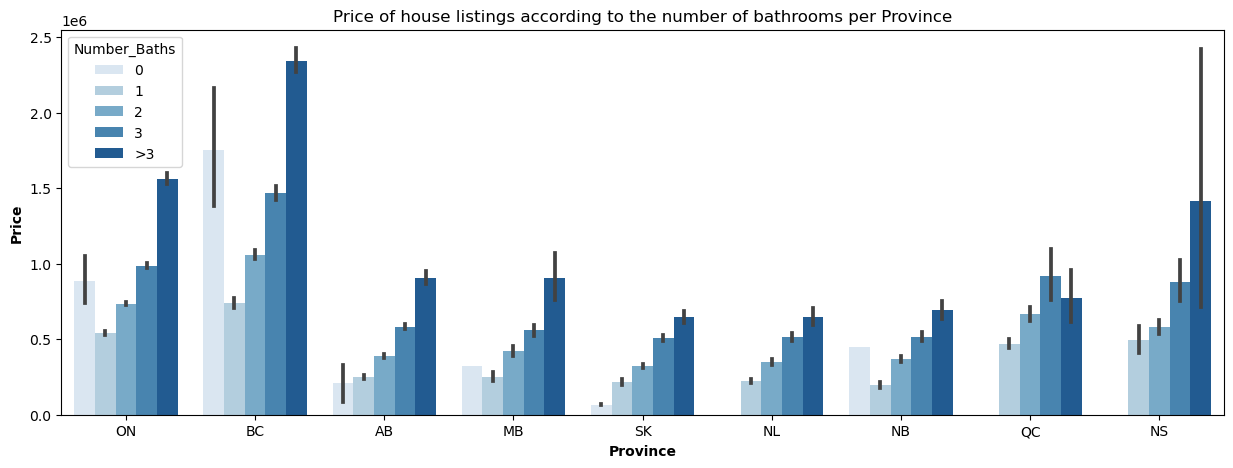

In [149]:
plt.figure(figsize = (15,5))
hue_order = ['0','1','2','3','>3']
sns.barplot(data = df,x = 'Province',y = 'Price', hue = 'Number_Baths', hue_order = hue_order, palette = "Blues")
plt.title("Price of house listings according to the number of bathrooms per Province")
plt.xlabel('Province',fontweight = 'bold')
plt.ylabel('Price',fontweight = 'bold')
plt.show()

In [150]:
df.sample(5)

,City,Price,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
1166,Toronto,819000.0,2,2,ON,5647656,97000.0
14350,Victoria,600000.0,2,2,BC,363222,85000.0
22455,Brantford,1449000.0,3,2,ON,104688,85000.0
15020,Windsor,419900.0,>4,2,ON,306519,82000.0
17710,Barrie,699000.0,>4,2,ON,154676,97000.0


In [151]:
# I have done a 80-20 train and test split
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.drop('Price',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

print(f'X_train size: {X_train.shape} | y_train size: {y_train.shape} | X_test size: {X_test.shape} | y_test size: {y_test.shape}')

X_train size: (26205, 6) | y_train size: (26205,) | X_test size: (6552, 6) | y_test size: (6552,)


In [152]:
#standardization and normalization for performance enhancement and using onehot encoder to convert categorical variables into numeric
#variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

ohe = OneHotEncoder(drop = 'first', sparse_output = False)
ohe_features = ['City','Province']
oe = OrdinalEncoder()
oe_features = ['Number_Beds','Number_Baths']
std = StandardScaler()
num_features = ['Population','Median_Family_Income']

ct = ColumnTransformer(transformers=[('ohe', ohe, ohe_features ),
                                     ('oe', oe , oe_features),
                                     ('scaler', std, num_features)
                                    ]
                       ,remainder='passthrough')


X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [153]:
import pandas as pd

# Assuming X_train and X_test are your original DataFrames and you want to see X_test_transformed as a DataFrame
# Step 1: Fit and transform the data as you've already done

# Assuming 'ct' is your ColumnTransformer instance
X_test_transformed = ct.transform(X_test)

# Step 2: Get feature names
# For one-hot encoded features
ohe_features_transformed = ct.named_transformers_['ohe'].get_feature_names_out(ohe_features)

# For ordinal encoded features and scaled features, we manually keep the names as they don't change
oe_features_transformed = oe_features  # These names stay the same
num_features_transformed = num_features  # These names stay the same

# Combine all feature names in the order they were transformed
transformed_columns = list(ohe_features_transformed) + oe_features_transformed + num_features_transformed

# For any 'remainder' columns that were not transformed and just passed through, add their names as well
# This step assumes your ColumnTransformer 'remainder' argument is not 'drop'
if ct.remainder != 'drop':
    remainder_columns = [col for col in X_test.columns if col not in ohe_features + oe_features + num_features]
    transformed_columns += remainder_columns

# Step 3: Recreate the DataFrame with the new array and column names
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_columns)

# Now, you can view the DataFrame
print(X_test_transformed_df.head())


   City_Airdrie  City_Barrie  City_Brantford  City_Burnaby  City_Caledon  \
0           0.0          0.0             0.0           0.0           0.0   
1           0.0          0.0             0.0           0.0           0.0   
2           0.0          0.0             0.0           0.0           0.0   
3           0.0          0.0             0.0           0.0           0.0   
4           0.0          0.0             0.0           0.0           0.0   

   City_Calgary  City_Edmonton  City_Guelph  City_Halifax  City_Hamilton  ...  \
0           0.0            0.0          0.0           0.0            0.0  ...   
1           0.0            0.0          0.0           0.0            0.0  ...   
2           0.0            0.0          0.0           0.0            0.0  ...   
3           0.0            0.0          0.0           0.0            1.0  ...   
4           0.0            0.0          0.0           0.0            0.0  ...   

   Province_NB  Province_NL  Province_NS  Province_ON  P

In [154]:
#linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)

In [155]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 511505520180.25336
R-squared: 0.3845360111851176


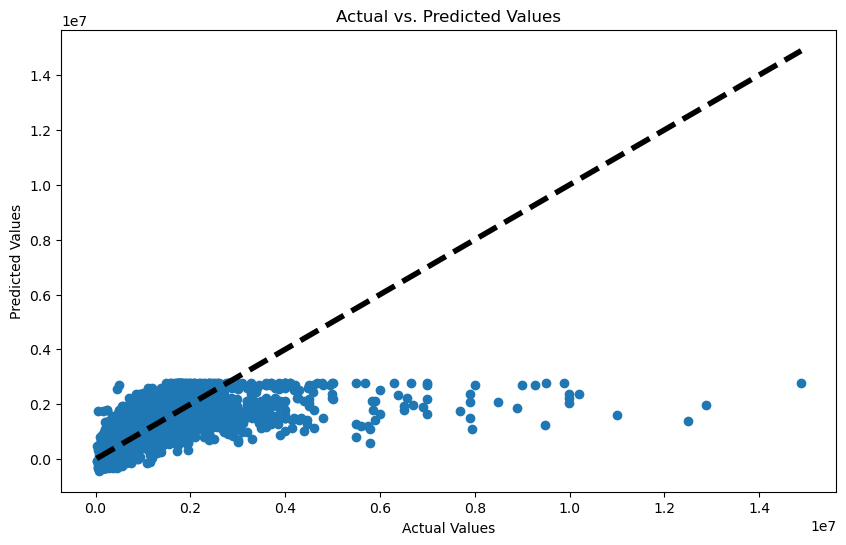

In [156]:
import matplotlib.pyplot as plt

# Assuming you have y_test for actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [157]:
import pandas as pd

# Assuming y_test is your actual values for the test set
# And assuming y_pred are the predictions made by the linear regression model

# Convert the first 10 actual and predicted values to a DataFrame for easy comparison
comparison_df = pd.DataFrame({'Actual Value': y_test[:10], 'Predicted Value': y_pred[:10]})

# Resetting the index for visual appeal if y_test is a pandas Series or DataFrame
comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison
print(comparison_df)


   Actual Value  Predicted Value
0      359000.0         724096.0
1      599900.0        1077120.0
2      559900.0         684672.0
3     1029000.0        1201152.0
4      259900.0         208512.0
5     2188000.0        1233664.0
6     5825000.0        2112640.0
7     1674900.0        1942784.0
8      719900.0         744576.0
9      848000.0        1427072.0


In [158]:
#ridge regressison
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_reg.fit(X_train_transformed, y_train)
y_pred = ridge_reg.predict(X_test_transformed)


In [159]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 511513387359.32385
R-squared: 0.384526545079239


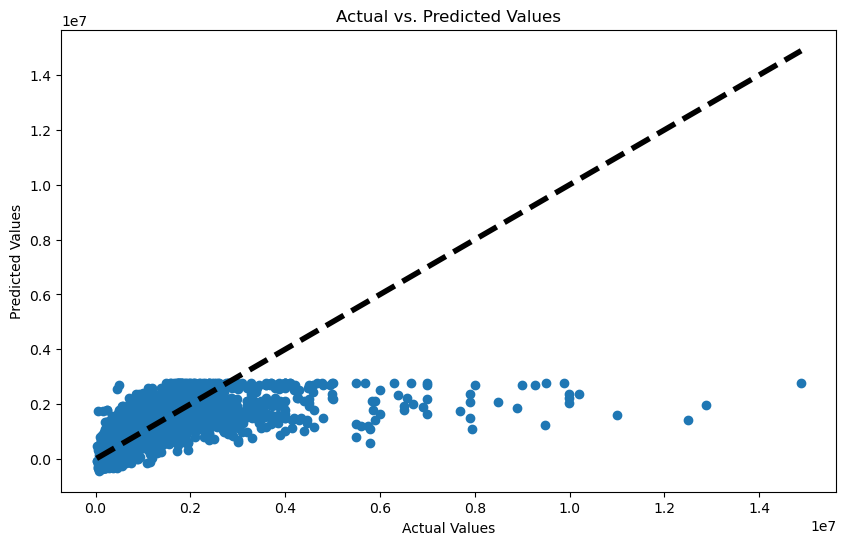

In [160]:
import matplotlib.pyplot as plt

# Assuming you have y_test for actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [161]:
import pandas as pd

# Assuming y_test is your actual values for the test set
# And assuming y_pred are the predictions made by the linear regression model

# Convert the first 10 actual and predicted values to a DataFrame for easy comparison
comparison_df = pd.DataFrame({'Actual Value': y_test[:10], 'Predicted Value': y_pred[:10]})

# Resetting the index for visual appeal if y_test is a pandas Series or DataFrame
comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison
print(comparison_df)


   Actual Value  Predicted Value
0      359000.0     7.251042e+05
1      599900.0     1.075419e+06
2      559900.0     6.845447e+05
3     1029000.0     1.201729e+06
4      259900.0     2.065797e+05
5     2188000.0     1.235033e+06
6     5825000.0     2.116769e+06
7     1674900.0     1.943693e+06
8      719900.0     7.460376e+05
9      848000.0     1.423847e+06


In [162]:
#lasso regressiom
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_transformed, y_train)
y_pred = lasso_reg.predict(X_test_transformed)


C:\Users\arshd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.060e+15, tolerance: 2.774e+12
  model = cd_fast.enet_coordinate_descent(


In [163]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 511527717909.763
R-squared: 0.3845093019852993


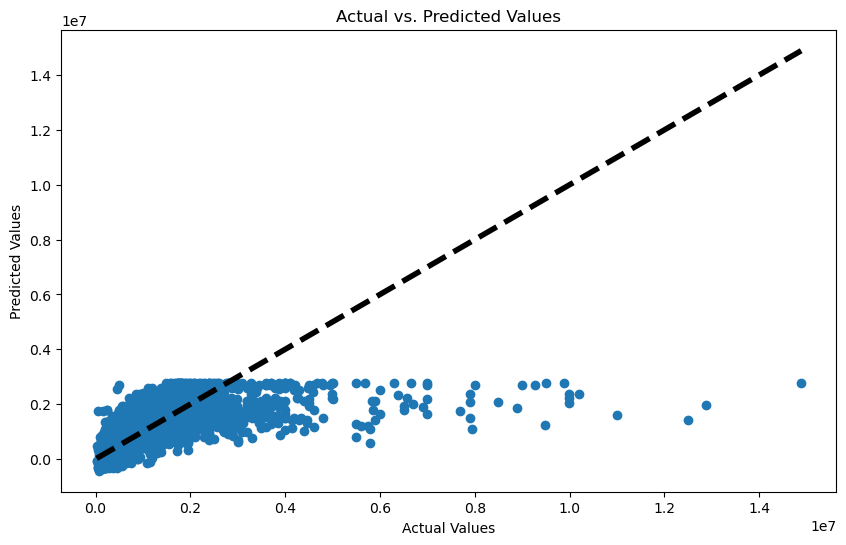

In [164]:
import matplotlib.pyplot as plt

# Assuming you have y_test for actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [175]:
BC_df = dfs_by_province['BC']


In [176]:
BC_df.head(5)

,City,Price,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
1276,Vancouver,550000.0,1,1,BC,2426160,90000.0
1277,Vancouver,649000.0,1,1,BC,2426160,90000.0
1278,Vancouver,2880000.0,2,2,BC,2426160,90000.0
1279,Vancouver,455000.0,1,1,BC,2426160,90000.0
1280,Vancouver,599000.0,1,1,BC,2426160,90000.0


In [142]:
# Drop the 'Address', 'Latitude' and 'Longitude' columns. I will not use this column to make predictions.
BC_df.drop(['Province'],axis = 1, inplace = True)

In [143]:
from sklearn.model_selection import train_test_split

y = BC_df['Price']
X = BC_df.drop('Price',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

print(f'X_train size: {X_train.shape} | y_train size: {y_train.shape} | X_test size: {X_test.shape} | y_test size: {y_test.shape}')

X_train size: (8784, 5) | y_train size: (8784,) | X_test size: (2196, 5) | y_test size: (2196,)


In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# Adjust the OneHotEncoder to ignore unknown categories
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_features = ['City',]
oe = OrdinalEncoder()
oe_features = ['Number_Beds', 'Number_Baths']
std = StandardScaler()
num_features = ['Population', 'Median_Family_Income']

ct = ColumnTransformer(transformers=[
    ('ohe', ohe, ohe_features),
    ('oe', oe, oe_features),
    ('scaler', std, num_features)
], remainder='passthrough')

# Now you can fit and transform your training data and transform your test data without encountering the error
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


In [145]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)

In [146]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 1242336420112.5918
R-squared: 0.2571899301962435


In [147]:
import pandas as pd

# Assuming y_test is your actual values for the test set
# And assuming y_pred are the predictions made by the linear regression model

# Convert the first 10 actual and predicted values to a DataFrame for easy comparison
comparison_df = pd.DataFrame({'Actual Value': y_test[:10], 'Predicted Value': y_pred[:10]})

# Resetting the index for visual appeal if y_test is a pandas Series or DataFrame
comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison
print(comparison_df)


   Actual Value  Predicted Value
0     1650000.0     2.557277e+06
1      799900.0     1.186939e+06
2      429000.0     4.253034e+05
3      699000.0     1.084696e+06
4      495000.0     1.084696e+06
5      699500.0     1.081416e+06
6     1299000.0     2.017795e+06
7      419900.0     8.883320e+05
8      678000.0     6.657981e+05
9      849800.0     1.186939e+06


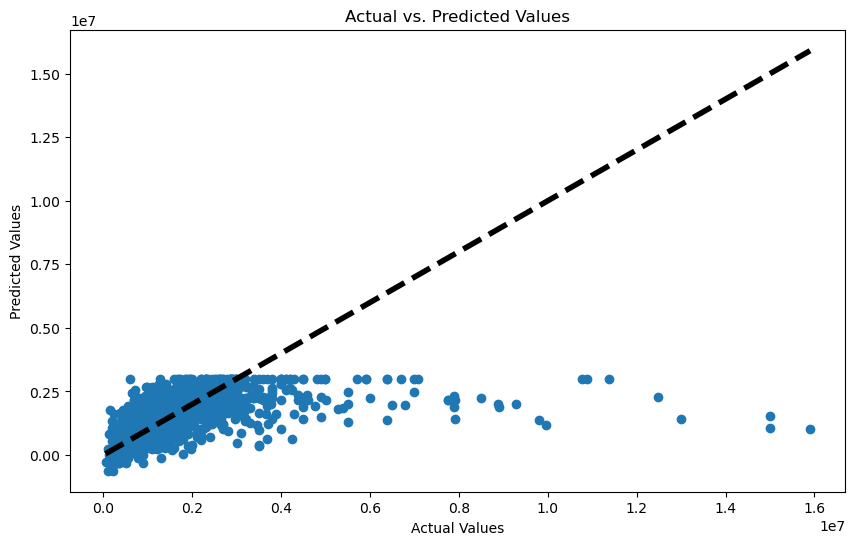

In [148]:
import matplotlib.pyplot as plt

# Assuming you have y_test for actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [178]:
# Create a dictionary of DataFrames, one for each province
dfs_by_city = {City: df_group for City, df_group in df.groupby('City')}

In [179]:
Toronto_df = dfs_by_city['Toronto']


In [180]:
Toronto_df.sample(5)

,City,Price,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
836,Toronto,1499000.0,4,2,ON,5647656,97000.0
38,Toronto,549900.0,1,1,ON,5647656,97000.0
295,Toronto,1189000.0,3,2,ON,5647656,97000.0
210,Toronto,558900.0,2,1,ON,5647656,97000.0
1198,Toronto,600000.0,1,1,ON,5647656,97000.0


In [181]:
# Drop the 'Address', 'Latitude' and 'Longitude' columns. I will not use this column to make predictions.
Toronto_df.drop(['City'],axis = 1, inplace = True)

In [198]:
from sklearn.model_selection import train_test_split

y = Toronto_df['Price']
X = Toronto_df.drop('Price',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

print(f'X_train size: {X_train.shape} | y_train size: {y_train.shape} | X_test size: {X_test.shape} | y_test size: {y_test.shape}')

X_train size: (1016, 5) | y_train size: (1016,) | X_test size: (254, 5) | y_test size: (254,)


In [199]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# Adjust the OneHotEncoder to ignore unknown categories
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_features = ['Province',]
oe = OrdinalEncoder()
oe_features = ['Number_Beds', 'Number_Baths']
std = StandardScaler()
num_features = ['Population', 'Median_Family_Income']

ct = ColumnTransformer(transformers=[
    ('ohe', ohe, ohe_features),
    ('oe', oe, oe_features),
    ('scaler', std, num_features)
], remainder='passthrough')

# Now you can fit and transform your training data and transform your test data without encountering the error
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


In [200]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)

In [201]:
#When we did it city wise for example toronto the performanc decreased as we had very less values left
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 404465530616.27405
R-squared: 0.48357103791098033


In [202]:
import pandas as pd

# Assuming y_test is your actual values for the test set
# And assuming y_pred are the predictions made by the linear regression model

# Convert the first 10 actual and predicted values to a DataFrame for easy comparison
comparison_df = pd.DataFrame({'Actual Value': y_test[:10], 'Predicted Value': y_pred[:10]})

# Resetting the index for visual appeal if y_test is a pandas Series or DataFrame
comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison
print(comparison_df)


   Actual Value  Predicted Value
0     1399000.0     1.860494e+06
1      648888.0     3.931307e+05
2      755000.0     5.625068e+05
3      975000.0     1.126812e+06
4     1695000.0     2.029870e+06
5      415000.0     5.625068e+05
6      942000.0     3.931307e+05
7      995900.0     1.126812e+06
8     1689000.0     1.296188e+06
9      999888.0     1.860494e+06


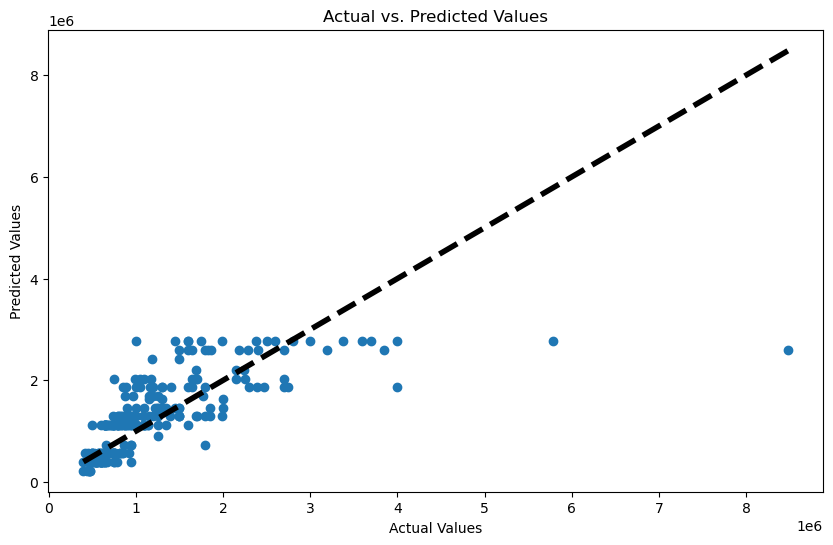

In [203]:
import matplotlib.pyplot as plt

# Assuming you have y_test for actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [204]:
Vancouver_df = dfs_by_city['Vancouver']


In [206]:
# Drop the 'Address', 'Latitude' and 'Longitude' columns. I will not use this column to make predictions.
Vancouver_df.drop(['City'],axis = 1, inplace = True)

In [207]:
from sklearn.model_selection import train_test_split

y = Vancouver_df['Price']
X = Vancouver_df.drop('Price',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

print(f'X_train size: {X_train.shape} | y_train size: {y_train.shape} | X_test size: {X_test.shape} | y_test size: {y_test.shape}')

X_train size: (1038, 5) | y_train size: (1038,) | X_test size: (260, 5) | y_test size: (260,)


In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# Adjust the OneHotEncoder to ignore unknown categories
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_features = ['Province',]
oe = OrdinalEncoder()
oe_features = ['Number_Beds', 'Number_Baths']
std = StandardScaler()
num_features = ['Population', 'Median_Family_Income']

ct = ColumnTransformer(transformers=[
    ('ohe', ohe, ohe_features),
    ('oe', oe, oe_features),
    ('scaler', std, num_features)
], remainder='passthrough')

# Now you can fit and transform your training data and transform your test data without encountering the error
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


In [210]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)

In [211]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 2182449058048.3188
R-squared: 0.3432055049549121


In [212]:
import pandas as pd

# Assuming y_test is your actual values for the test set
# And assuming y_pred are the predictions made by the linear regression model

# Convert the first 10 actual and predicted values to a DataFrame for easy comparison
comparison_df = pd.DataFrame({'Actual Value': y_test[:10], 'Predicted Value': y_pred[:10]})

# Resetting the index for visual appeal if y_test is a pandas Series or DataFrame
comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison
print(comparison_df)


   Actual Value  Predicted Value
0      724900.0     5.115751e+05
1     5598000.0     3.271707e+06
2     2789000.0     2.833367e+06
3     1698000.0     2.790004e+06
4      999888.0     1.431619e+06
5      899000.0     1.431619e+06
6     1199000.0     1.431619e+06
7     1599900.0     1.913323e+06
8     2998000.0     2.833367e+06
9      369000.0     2.987167e+04


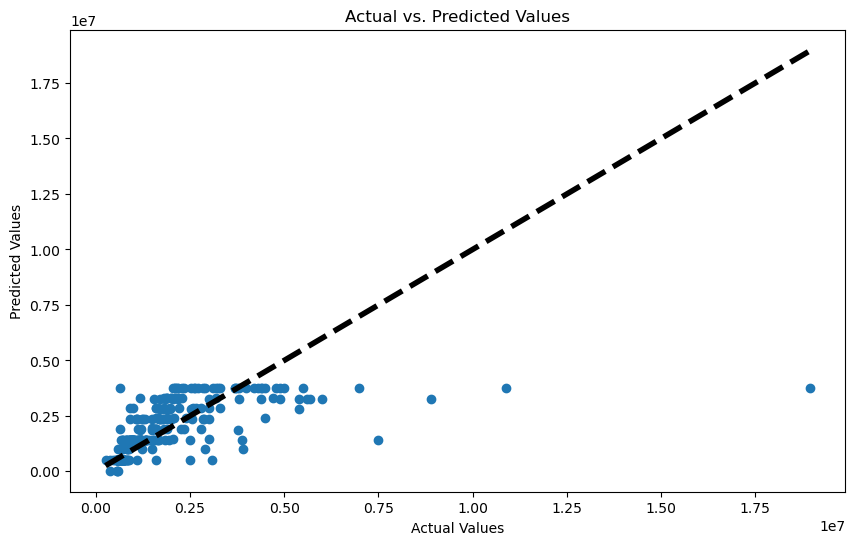

In [213]:
import matplotlib.pyplot as plt

# Assuming you have y_test for actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()
